<a href="https://colab.research.google.com/github/rajitha-ramasayam/langchain-academy/blob/groq/AgentChronicDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/chain.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58238466-lesson-4-chain)

In [7]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph groq langchain_groq

In [8]:
import os, getpass
from langchain_groq import ChatGroq

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GROQ_API_KEY")

llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0)

In [9]:
from langchain_core.messages import AIMessage, HumanMessage

def intake_coordinator(state) -> str:
    # Patient intake.
    print("---------------------------------------------------------------------------")
    print("Intake Coordinator Agent: Working on checking the patient with below details")
    print("---------------------------------------------------------------------------")
    print(state['messages'])


def personalized_care_planner(state) -> str:
    # Create personalized care plan.
    print("---------------------------------------------------------------------------")
    print("Personalized Care Planner Agent: Creating personalized care plan")
    print("---------------------------------------------------------------------------")
    response = llm.invoke([HumanMessage(content=f"You are the personalized care planner. Provide the care plan for the patient with the below information {state}")])
    print(response.content[0:250])

def health_educator(state) -> str:
    # Delivers personalized educational materials.
    print("---------------------------------------------------------------------------")
    print("Health Educator Agent: Delivering personalized educational materials")
    print("---------------------------------------------------------------------------")
    response = llm.invoke([HumanMessage(content=f"You are the health educator, your responsibility is to provide personalized educational materials for the patients. Please provide the personalized health materials for the patient with below details {state}")])
    print(response.content[0:250])

def monitoring_agent(state) -> str:
    # Get patient health data through wearable devices
    print("---------------------------------------------------------------------------")
    print("Monitoring Agent: Getting patient health data from wearable devices")
    response = llm.invoke([HumanMessage(content=f"You are the health monitoring agent, your responsibility is to provide monitoring alerts and suggestions for the patients with the data gathered from wearable devices. Please provide suggestions for the patient with below details {state}")])
    print(response.content[0:250])
    print("---------------------------------------------------------------------------")

def mental_health_coach(state) -> str:
    # Engages patients with tailored cognitive-behavioral techniques and motivational messages.
    print("---------------------------------------------------------------------------")
    print("Mental Health Coach Agent: Engages patients with tailored cognitive-behavioral techniques and motivational messages")
    response = llm.invoke([HumanMessage(content=f"You are the behavior health coach, your responsibility is to provide patients with tailored cognitive-behavioral techniques and motivational messages. Please provide the same for the patient with below details {state}")])
    print(response.content[0:250])
    print("---------------------------------------------------------------------------")

def provider_communication(state) -> str:
    # Shares patient progress, alerts, and care plan updates with the care team, Collects feedback from providers and incorporates it into the care plan
    print("---------------------------------------------------------------------------")
    print("Provider Communication Agent: Sharing patient progress, alerts, and care plan updates with the care team.")
    response = llm.invoke([HumanMessage(content=f"You are the provider communication agent, your responsibility is to Share patient progress, alerts, and care plan updates with the care team. Please share with the provider, the patient with below details {state}")])
    print(response.content[0:250])
    print("---------------------------------------------------------------------------")

def predictive_analytics(state) -> str:
    # Analyzes patient trends to predict potential complications.
    print("---------------------------------------------------------------------------")
    print("Predictive Analytics: Analyzes patient trends to predict potential complications.")
    response = llm.invoke([HumanMessage(content=f"You are the predictive health agent, your responsibility is to analyze patient trends to predict potential complications. Please analyze the patient with below details {state}")])
    print(response.content[0:250])
    print("---------------------------------------------------------------------------")

llm_with_tools = llm.bind_tools([intake_coordinator, personalized_care_planner, health_educator, monitoring_agent, mental_health_coach, provider_communication, predictive_analytics])

In [14]:
from typing_extensions import TypedDict

class PatientDetails(TypedDict):
    patient_id: str
    name: str
    age: int
    gender: str
    medical_history: str
    current_medications: str
    allergies: str
    contact_information: str
    emergency_contact: str
    insurance_information: str


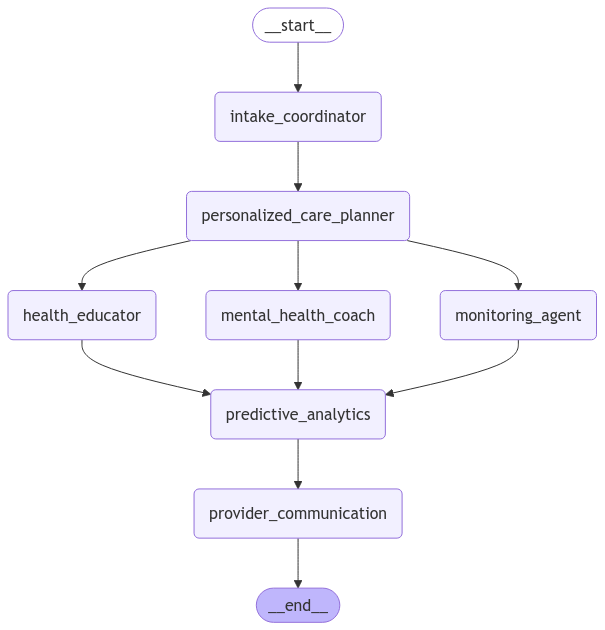

In [15]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

# Node
# def intake_coordinator(state: MessagesState):
#    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
# Add nodes
builder.add_node("intake_coordinator", intake_coordinator)
builder.add_node("personalized_care_planner", personalized_care_planner)
builder.add_node("health_educator", health_educator)
builder.add_node("monitoring_agent", monitoring_agent)
builder.add_node("mental_health_coach", mental_health_coach)
builder.add_node("provider_communication", provider_communication)
builder.add_node("predictive_analytics", predictive_analytics)

# Add Edges
builder.add_edge(START, "intake_coordinator")
builder.add_edge("intake_coordinator", "personalized_care_planner")
builder.add_edge("personalized_care_planner", "health_educator")
builder.add_edge("personalized_care_planner", "mental_health_coach")
builder.add_edge("personalized_care_planner", "monitoring_agent")
builder.add_edge("mental_health_coach", "predictive_analytics")
builder.add_edge("health_educator", "predictive_analytics")
builder.add_edge("monitoring_agent", "predictive_analytics")
builder.add_edge("predictive_analytics","provider_communication" )

builder.add_edge("provider_communication", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
# prompt: invoke graph object with some fake patient data

patient = PatientDetails(patient_id="123", name="Rajitha", age=30, gender="Female",
                        medical_history="Migraines", current_medications="None",
                        allergies="None", contact_information="123-456-7890",
                        emergency_contact="987-654-3210", insurance_information="XYZ Insurance")
# state = MessagesState(messages=[HumanMessage(content=f"Patient intake for patient data {patient.name}", name="Raj")])
state = {"messages": [HumanMessage(content=f"Patient intake for patient data {patient['name']}, age: {patient['age']}, symptoms: {patient.get('symptoms', 'N/A')}, history: {patient.get('history', 'N/A')}, wearable_data: {patient.get('wearable_data', 'N/A')}, behavior_issues: {patient.get('behavior_issues', 'N/A')}", name="Raj")]}

graph.invoke(state)

---------------------------------------------------------------------------
Intake Coordinator Agent: Working on checking the patient with below details
---------------------------------------------------------------------------
[HumanMessage(content='Patient intake for patient data Rajitha, age: 30, symptoms: N/A, history: N/A, wearable_data: N/A, behavior_issues: N/A', additional_kwargs={}, response_metadata={}, name='Raj', id='e9e86279-8184-48a2-9b4a-72004184e270')]
---------------------------------------------------------------------------
Personalized Care Planner Agent: Creating personalized care plan
---------------------------------------------------------------------------
Care Plan for Patient: Rajitha (Age: 30)

1. Initial Assessment:
Given the lack of symptoms, history, wearable data, and behavior issues provided, the first step is to conduct a thorough assessment of the patient's health status. This includes:
a. Me
----------------------------------------------------------

{'messages': [HumanMessage(content='Patient intake for patient data Rajitha, age: 30, symptoms: N/A, history: N/A, wearable_data: N/A, behavior_issues: N/A', additional_kwargs={}, response_metadata={}, name='Raj', id='e9e86279-8184-48a2-9b4a-72004184e270')]}